## Norman 2022 dataset - makes no sense

In [3]:
import scanpy as scp
import pandas as pd
import numpy as np

Read-in bulk data. Apparently should be used as a reference for perturbations

In [128]:
bulk_raw = scp.read_h5ad('./data/K562_essential_normalized_bulk_01.h5ad')

In [129]:
bulk_raw.var[bulk_raw.var.gene_name == gene]

,gene_name,mean,std,cv,in_matrix,gini,clean_mean,clean_std,clean_cv
gene_id,,,,,,,,,
ENSG00000110104,CCDC86,0.701475,0.175006,0.249483,True,0.137211,0.749281,0.17782,0.237321


In [130]:
bulk_raw.var[bulk_raw.var.gene_name==gene]

,gene_name,mean,std,cv,in_matrix,gini,clean_mean,clean_std,clean_cv
gene_id,,,,,,,,,
ENSG00000110104,CCDC86,0.701475,0.175006,0.249483,True,0.137211,0.749281,0.17782,0.237321


Read-in scRNAseq data with perturbations. As the first step we want to explore what happens when perturbing gene CCDC86, then will see...

In [131]:
ss_norm = scp.read_h5ad('./data/K562_essential_normalized_singlecell_01.h5ad')

In [132]:
gene = 'CCDC86'
gene_id = 'ENSG00000110104'
gene_id2 = 'ENSG00000188976'

We take all the cells where this gene is perturbed and running AD test to see whether it is within the distribution or not. Where is the reference???

In [123]:
cells = ss_norm.obs[ss_norm.obs.gene == gene].index

In [124]:
counts = []
for c in cells:
    counts.extend(ss_norm[c, gene_id].obs.core_adjusted_UMI_count.values)

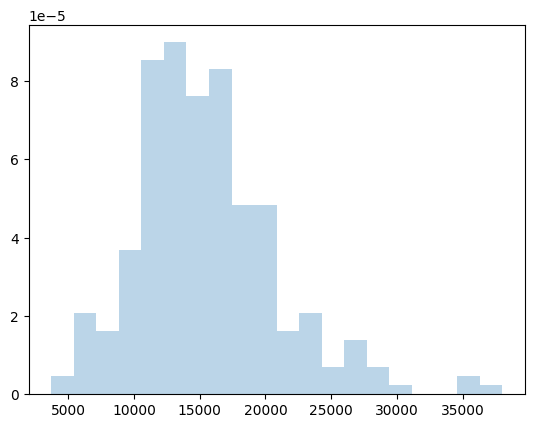

In [126]:
import matplotlib.pyplot as plt
plt.hist(counts,bins=20,alpha=0.3,density=True);

In [122]:
np.mean(counts), np.mean(counts2)

(15461.816, 14927.192)

## Norman 2019 Science dataset - makes sense

In [1]:
from gears import PertData, GEARS
from gears.utils import dataverse_download

In [2]:
## Download dataloader from dataverse
dataverse_download('https://dataverse.harvard.edu/api/access/datafile/6979957', 'norman_umi_go.tar.gz')

## Extract and set up dataloader directory
import tarfile
with tarfile.open('norman_umi_go.tar.gz', 'r:gz') as tar:
    tar.extractall()

Downloading...
100%|██████████████████████████████████████████████████████████████| 1.10G/1.10G [04:42<00:00, 3.87MiB/s]


In [6]:
df = scp.read_h5ad('./data/Norman_2019/norman_umi_go/perturb_processed.h5ad')

In [5]:
df

AnnData object with n_obs × n_vars = 91205 × 5054
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'hvg', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov', 'rank_genes_groups_cov_all', 'rank_genes_groups_cov_top100', 'rank_genes_groups_cov_top200', 'rank_genes_groups_cov_top50', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'